# ***Approaches Used***

## ***Resampling Approach 2***

In [ ]:
import pandas as pd

def resample_and_save(input_file, output_file, frames):
    # Read CSV file without header (column names)
    data = pd.read_csv(input_file, header=None)

    # Giving column names as per documentation reference
    data.columns = ['x', 'y', 'z', 'timestamp']

    # Calculate the resampling rate
    resampling_rate = len(data) / frames
    indices=[]

    for i in range(1,frames+1):
        indices.append(round((resampling_rate*i)-1))

    resampled_data = data.iloc[indices]

    # Save resampled data to a new CSV file
    resampled_data.to_csv(output_file, index=True)

frames=1445

resample_and_save('./Dataset/accel_data.csv', 'resampled_accel_data.csv', frames)
resample_and_save('./Dataset/gyro_data.csv', 'resampled_gyro_data.csv', frames)
resample_and_save('./Dataset/mag_data.csv', 'resampled_mag_data.csv', frames)



## ***Resampling Approach 3 (Inuse)***

In [ ]:
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Load your data from the CSV file
df = pd.read_csv('accel_data.csv',header=None)
df.columns = ['x', 'y', 'z', 'timestamp']

# Assuming 'timestamp' is the column with time information and 'value' is your data
timestamps = df['timestamp'].values
original_values = df['x'].values

# Generate indices for the downsampled data
downsampled_indices = np.linspace(0, len(original_values) - 1, 1445)
print(downsampled_indices)

# Use cubic spline interpolation
cubic_spline = CubicSpline(np.arange(len(original_values)), original_values)

# Interpolate at the downsampled indices
downsampled_values = cubic_spline(downsampled_indices)

# Create a DataFrame with the downsampled data
downsampled_df = pd.DataFrame({'timestamp': timestamps[downsampled_indices.astype(int)],
                               'downsampled_value': downsampled_values})

# Save or further analyze the downsampled data
downsampled_df.to_csv('downsampled_data.csv', index=True)

# Plot original and downsampled data for visualization
plt.plot(timestamps, original_values, label='Original Data')
plt.plot(downsampled_df['timestamp'], downsampled_df['downsampled_value'], 'o', label='Downsampled Data')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

## ***Frames downsampling***

In [ ]:
import cv2
import os

def extract_frames(video_path, output_folder, factor):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get video properties
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Calculate the downsampling interval
    interval = factor

    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through frames and extract every 'factor' frame
    x=0
    for i in range(0, frame_count, interval):
        # Set the frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)

        # Read the frame
        ret, frame = cap.read()

        if ret:
            # Save the frame with padded numbering
            frame_number = x + 1  # Adjust frame numbering starting from 1
            frame_number_str = f"{frame_number:02d}"  # Padded with zeros
            frame_filename = f"{output_folder}/{frame_number_str}.png"
            cv2.imwrite(frame_filename, frame)
            x=x+1

    # Release the video capture object
    cap.release()

if __name__ == "__main__":
    video_path = "./Dataset/video.mp4"
    output_folder = "DownSampledVideo_Frames"
    downsampling_factor = 50

    extract_frames(video_path, output_folder, downsampling_factor)

## ***Testing***

In [1]:
import pandas as pd

data1 = pd.read_csv("./Dataset/accel_data.csv",header=None)

data1.columns = ['x', 'y', 'z', 'timestamp']
# selected_rows = data.iloc[[3,7,10]]

# Save the selected rows to a new CSV file
# selected_rows.to_csv("test.csv", header=False, index=True)
print(data1.head(5),"\n",data1.tail(5), len(data1))

       x      y      z        timestamp
0  0.162  9.565  0.203  464527567559230
1  0.162  9.557  0.160  464527569987465
2  0.076  9.586  0.153  464527587605388
3  0.126  9.579  0.196  464527599286297
4  0.134  9.579  0.203  464527599809374 
           x      y      z        timestamp
4937  0.284  9.615 -0.026  464576877819080
4938  0.306  9.579  0.038  464576887828854
4939  0.299  9.572  0.110  464576897838547
4940  0.292  9.522  0.167  464576907817854
4941  0.306  9.471  0.181  464576917827541 4942


In [13]:
data1['x'].values

array([0.162, 0.162, 0.076, ..., 0.299, 0.292, 0.306])

In [6]:
frames=1445

res = (len(data))/frames
print(res)

indices=[]

for i in range(1,frames+1):
    indices.append(round((res*i)-1))

print(indices)

# data.iloc[indices].to_csv("test.csv", header=False, index=True)

3.420069204152249
[2, 6, 9, 13, 16, 20, 23, 26, 30, 33, 37, 40, 43, 47, 50, 54, 57, 61, 64, 67, 71, 74, 78, 81, 85, 88, 91, 95, 98, 102, 105, 108, 112, 115, 119, 122, 126, 129, 132, 136, 139, 143, 146, 149, 153, 156, 160, 163, 167, 170, 173, 177, 180, 184, 187, 191, 194, 197, 201, 204, 208, 211, 214, 218, 221, 225, 228, 232, 235, 238, 242, 245, 249, 252, 256, 259, 262, 266, 269, 273, 276, 279, 283, 286, 290, 293, 297, 300, 303, 307, 310, 314, 317, 320, 324, 327, 331, 334, 338, 341, 344, 348, 351, 355, 358, 362, 365, 368, 372, 375, 379, 382, 385, 389, 392, 396, 399, 403, 406, 409, 413, 416, 420, 423, 427, 430, 433, 437, 440, 444, 447, 450, 454, 457, 461, 464, 468, 471, 474, 478, 481, 485, 488, 491, 495, 498, 502, 505, 509, 512, 515, 519, 522, 526, 529, 533, 536, 539, 543, 546, 550, 553, 556, 560, 563, 567, 570, 574, 577, 580, 584, 587, 591, 594, 598, 601, 604, 608, 611, 615, 618, 621, 625, 628, 632, 635, 639, 642, 645, 649, 652, 656, 659, 662, 666, 669, 673, 676, 680, 683, 686, 690, 693

In [20]:
from matplotlib import axis
import pandas as pd
data2= pd.read_csv("./Dataset/accel_data.csv",header=None)
# data2.columns = ['timestamp']

4942

In [21]:
(data1["timestamp"].iloc[1:4942]-data2["timestamp"].iloc[1]).idxmin()

4941

[0.00000000e+00 3.42174515e+00 6.84349030e+00 ... 4.93415651e+03
 4.93757825e+03 4.94100000e+03]


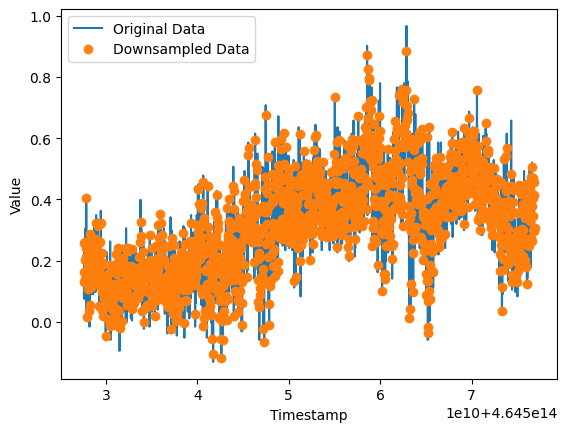

In [26]:
import pandas as pd
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Load your data from the CSV file
df = pd.read_csv('accel_data.csv',header=None)
df.columns = ['x', 'y', 'z', 'timestamp']

# Assuming 'timestamp' is the column with time information and 'value' is your data
timestamps = df['timestamp'].values
original_values = df['x'].values

# Generate indices for the downsampled data
downsampled_indices = np.linspace(0, len(original_values) - 1, 1445)
print(downsampled_indices)

# Use cubic spline interpolation
cubic_spline = CubicSpline(np.arange(len(original_values)), original_values)

# Interpolate at the downsampled indices
downsampled_values = cubic_spline(downsampled_indices)

# Create a DataFrame with the downsampled data
downsampled_df = pd.DataFrame({'timestamp': timestamps[downsampled_indices.astype(int)],
                               'downsampled_value': downsampled_values})

# Save or further analyze the downsampled data
downsampled_df.to_csv('downsampled_data.csv', index=True)

# Plot original and downsampled data for visualization
plt.plot(timestamps, original_values, label='Original Data')
plt.plot(downsampled_df['timestamp'], downsampled_df['downsampled_value'], 'o', label='Downsampled Data')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()